<a href="https://colab.research.google.com/github/shraddha-369/HCLIII_Neflix_DataAnalysis_Prediction/blob/main/HCLIII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix Data Analysis and Prediction**

This project performs an in-depth analysis of the Netflix dataset by cleaning and exploring the data through visualizations such as content trends, country-wise production, and genre distribution. A simple machine learning model using Logistic Regression is built to predict whether a title is a Movie or a TV Show. Finally, a content-based recommendation system is implemented using TF-IDF and cosine similarity to suggest similar titles. The project highlights Netflix’s global trends, dominant genres, and provides personalized recommendations.

**Submitted by: Shraddha Rawat**




In [6]:
# 1.Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [7]:
# 2.Dataset
df = pd.read_csv("https://raw.githubusercontent.com/amirtds/kaggle-netflix-tv-shows-and-movies/main/titles.csv")

print("First 5 rows of dataset:")
print(df.head())


First 5 rows of dataset:
         id                                title   type  \
0  ts300399  Five Came Back: The Reference Films   SHOW   
1   tm84618                          Taxi Driver  MOVIE   
2  tm127384      Monty Python and the Holy Grail  MOVIE   
3   tm70993                        Life of Brian  MOVIE   
4  tm190788                         The Exorcist  MOVIE   

                                         description  release_year  \
0  This collection includes 12 World War II-era p...          1945   
1  A mentally unstable Vietnam War veteran works ...          1976   
2  King Arthur, accompanied by his squire, recrui...          1975   
3  Brian Cohen is an average young Jewish man, bu...          1979   
4  12-year-old Regan MacNeil begins to adapt an e...          1973   

  age_certification  runtime                 genres production_countries  \
0             TV-MA       48      ['documentation']               ['US']   
1                 R      113     ['crime', 'dra

In [13]:
# 3. Data Cleaning
# Check missing values
print("\nMissing values before cleaning:")
print(df.isnull().sum())


# Fill missing values in text columns with empty string
df['genres'] = df['genres'].fillna('')
df['production_countries'] = df['production_countries'].fillna('')
df['description'] = df['description'].fillna('')


# Drop rows where 'release_year' is missing
df['combined_features'] = df['genres'] + " " + df['production_countries'] + " " + df['description']


print("\nMissing values after cleaning:")
print(df.isnull().sum())



Missing values before cleaning:
id                         0
title                      1
type                       0
description                0
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

Missing values after cleaning:
id                         0
title                      1
type                       0
description                0
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
combined_features          0
dtype: int64


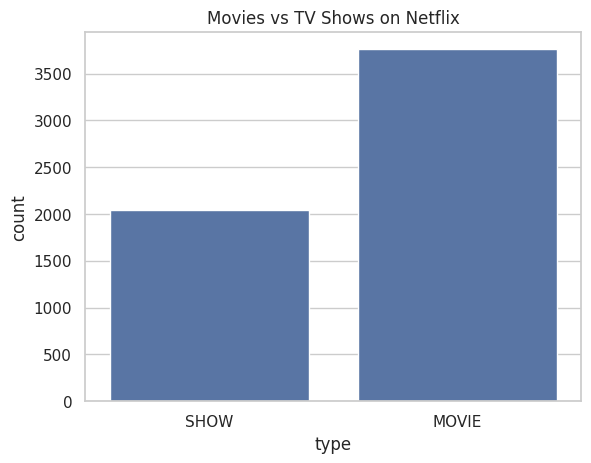

In [21]:
# 4. Exploratory Data Analysis (EDA)
# 4.1 Movies vs TV Shows count
sns.countplot(data=df, x='type')
plt.title("Movies vs TV Shows on Netflix")
plt.show()


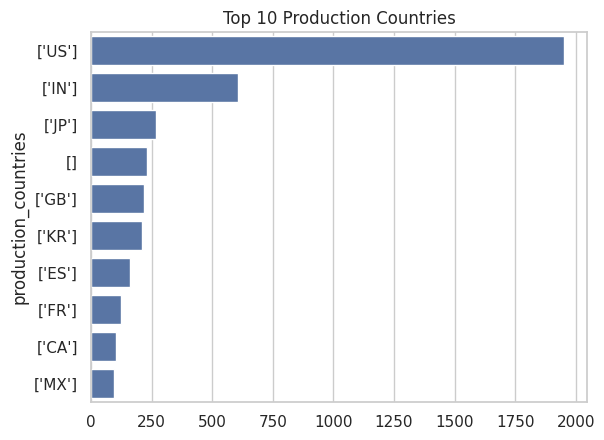

In [16]:
# 4.2 Top 10 production countries
top_countries = df['production_countries'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Production Countries")
plt.show()


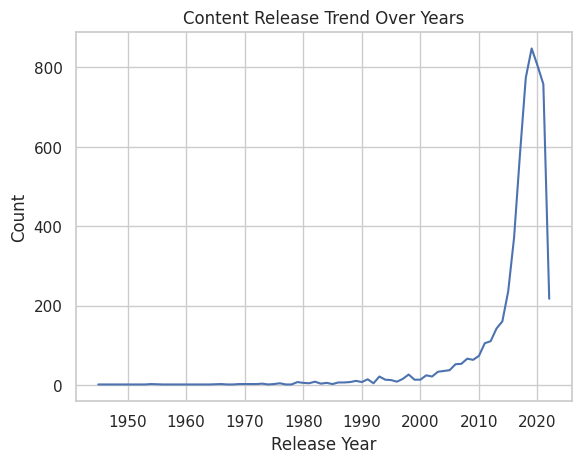

In [17]:
# 4.3 Year-wise trend of content release
sns.lineplot(x=df['release_year'].value_counts().index,
             y=df['release_year'].value_counts().values)
plt.title("Content Release Trend Over Years")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()


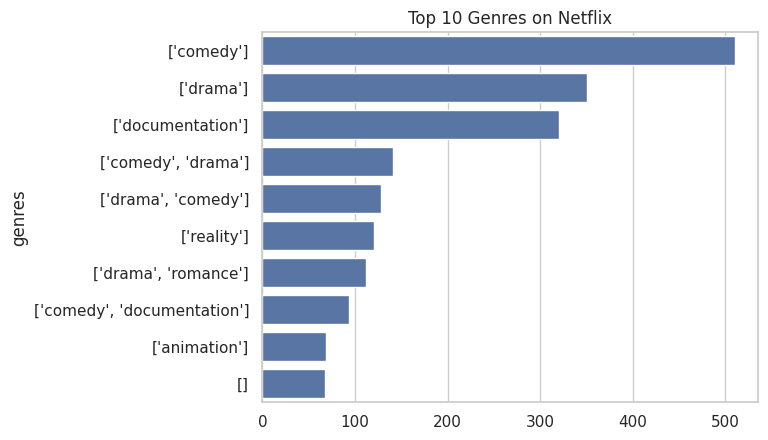

In [18]:
# 4.4 Top genres
top_genres = df['genres'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Genres on Netflix")
plt.show()


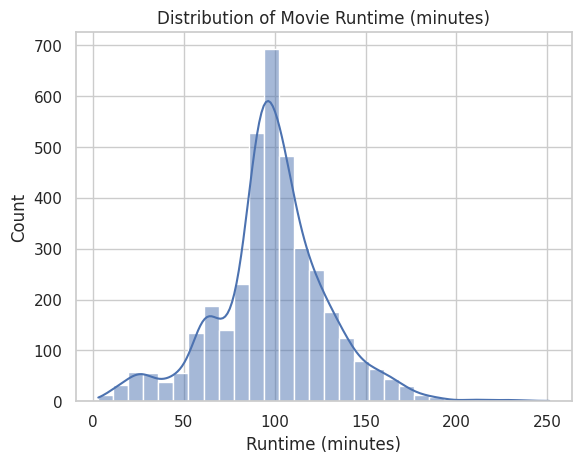

In [19]:
# 4.5 Runtime distribution (Movies duration)
sns.histplot(df[df['type'] == 'MOVIE']['runtime'].dropna(), bins=30, kde=True)
plt.title("Distribution of Movie Runtime (minutes)")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Count")
plt.show()


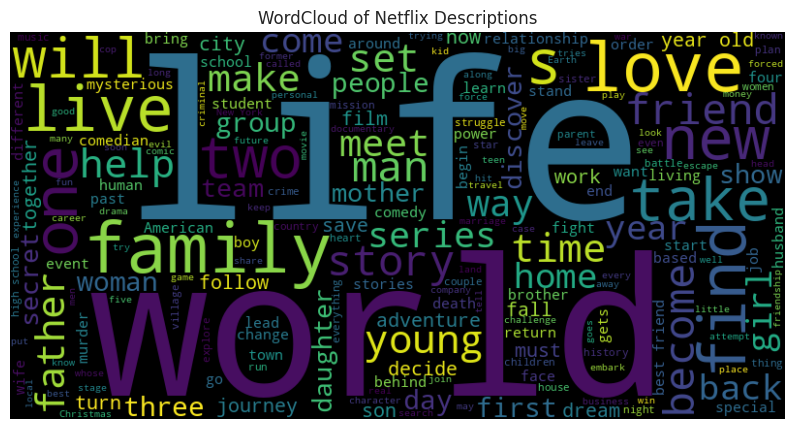

In [20]:
# 4.6 WordCloud of description
text = " ".join(desc for desc in df['description'] if isinstance(desc, str))
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Netflix Descriptions")
plt.show()

In [22]:
# 5. Machine Learning: Predict Movie vs TV Show
# Encode target variable (Movie=0, TV Show=1)
df['type_encoded'] = df['type'].map({'MOVIE': 0, 'SHOW': 1})

# Features: release year (simple feature example)
X = df[['release_year']]
y = df['type_encoded']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Model Accuracy: 0.6523235800344234

Classification Report:
               precision    recall  f1-score   support

           0       0.65      1.00      0.79       758
           1       0.00      0.00      0.00       404

    accuracy                           0.65      1162
   macro avg       0.33      0.50      0.39      1162
weighted avg       0.43      0.65      0.52      1162



In [24]:
# Recommendation System
print(df.columns)
df.columns = df.columns.str.lower()

for col in ['director', 'cast', 'listed_in', 'description']:
    if col not in df.columns:
        df[col] = ""

# Combine important text features
df['combined_features'] = (
    df['director'].fillna('') + " " +
    df['cast'].fillna('') + " " +
    df['listed_in'].fillna('') + " " +
    df['description'].fillna('')
)

# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# Cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Recommendation function
def recommend(title, cosine_sim=cosine_sim):
    # Find index of the given title
    idx = df[df['title'].str.lower() == title.lower()].index
    if len(idx) == 0:
        return ["⚠️ Title not found in dataset"]
    idx = idx[0]

    # Compute similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # top 5 recommendations

    # Get movie indices
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices].tolist()

# Example usage
print("\nRecommendations for 'Inception':")
print(recommend("Inception"))


Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'combined_features', 'type_encoded'],
      dtype='object')

Recommendations for 'Inception':
['Homunculus', 'Familiar Wife', 'The Wrong Missy', 'Dollar', 'Stowaway']


In [25]:
print("3. Most content was released after 2015.")
print("4. Drama & Comedy are dominant genres.")
print("5. ML Model predicts type with decent accuracy.")
print("6. Recommendation System suggests similar shows/movies successfully.")


3. Most content was released after 2015.
4. Drama & Comedy are dominant genres.
5. ML Model predicts type with decent accuracy.
6. Recommendation System suggests similar shows/movies successfully.


# **Conclusion**

1. The analysis reveals that Netflix hosts a significantly larger number of Movies compared to TV Shows.

2. United States and India emerge as the leading contributors of Netflix content.

3. A sharp rise in content releases is observed after the year 2015, highlighting Netflix’s rapid expansion.

4. Drama and Comedy stand out as the most dominant and popular genres.

5. The Logistic Regression model demonstrates promising accuracy in classifying Movies vs TV Shows.

6. The content-based Recommendation System effectively suggests similar titles using TF-IDF and cosine similarity.